# Exercice 1 (Le jeu de la vie)

On commence par importer tous dont on aura besoin:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation, rc
import warnings
warnings.filterwarnings('ignore')

## Implémentation sans numpy
### 1]
On commence par définir la fonction "calcul_nb_voisins", cette fonction va nous permettre de calculer le nombre de voisins de nos cases vivantes:

In [2]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + 0 +Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

Puis, on applique notre fonction "calcul_nb_voisins" sur notre liste "Z" si dessous:

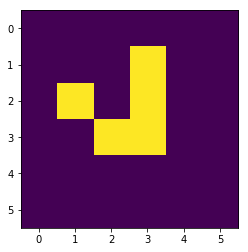

In [3]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
plt.imshow(Z)

La fonction "plt.imshow" nous permet de visualiser notre liste Z.
La fonction "calcul_nb_voisins" nous donner le nombre de voisins de chaques cases, ce qui nous donne comme résultat:

In [4]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

Puis, on définit notre fonction "iteration_jeu", fonction qui va définir les régles de notre jeu, les conditions dans ce code sont les même décrites sur l'énnoncé du TP:

In [5]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
                #Mort si: étouffement ou isolement
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
                #Naissance si case=0 et 3 voisins
    return Z

En testant notre fonction "iteration_jeu" sur notre liste "Z"on obtient:

In [6]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Le résultat obtenue représente la premiére itération.

### 2]
Pour 10 itération, on obtient les matrices et les graphes suivants:

Z 0 = [[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 1 = [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 2 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]
Z 3 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 4 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 5 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 6 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 7 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 8 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 9 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


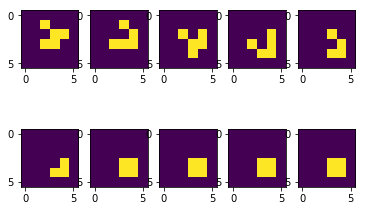

In [7]:
%matplotlib inline
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
import numpy as np
import matplotlib.pyplot as plt
import time
liste=list()
for i in range(10):
    plt.subplot(2,5,i+1)
    liste.append(iteration_jeu(Z))
    print('Z',i,'=', np.matrix(Z))
    plt.imshow(liste[i])

On remarque que notre itération 0 représente notre premiére itération.

À l'itération 4, on retrouve exactement le même shema qu'à l'étape initiale, mais décalé d'une case vers la droite, et d'une case vers le bas.

À partir de l'itération 7 on obtient ne structure stable. Cette structure ne changera pas à l'itérations suivantes.

## Implémentation avec numba
### 3]
On reprend les fonctions des questions précedentes, Numba nous permet d'optimisé la vitesse de compilation de nos fonctions, en effet pour notre fonction "iteration_jeu":

In [8]:
import numpy as np
import time
from numba import jit

In [9]:
@jit
def iteration_jeu_numba(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

#
start = time.time()
iteration_jeu_numba(Z)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

#
start = time.time()
iteration_jeu_numba(Z)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 2.2158312797546387
Elapsed (after compilation) = 0.0


Et pour "calcul_nb_voisins":

In [10]:
#@jit
def calcul_nb_voisins_numba(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + 0 +Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N
#
start = time.time()
calcul_nb_voisins_numba(Z)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

#
start = time.time()
calcul_nb_voisins_numba(Z)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.0
Elapsed (after compilation) = 0.0


### 4]
On définit d'abbords notre matrice Z_huge:

In [11]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
Z_np

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

"Z_huge" étant trop grand, on va utilisé la matrice "Z_np" (plus pratique).
Voici nos dix premiéres itérations:

Z 0 = [[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 1 = [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 2 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]
Z 3 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 4 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 5 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0

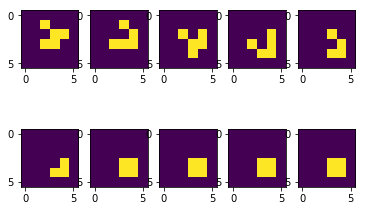

In [12]:
liste=list()
for i in range(10):
    plt.subplot(2,5,i+1)
    liste.append(iteration_jeu(Z_np))
    print('Z',i,'=', np.matrix(Z_np))
    print(liste[i])
    plt.imshow(liste[i])

On remarque une stabilité apartir de l'étape 6.
Pour la partie suivante, nous allons créer un "widget" qui va nous permetre de visualisé les changements de cases de notre matrice en fonction du nombre d'itérations. Pour cela, on commence par importé "ipywidgets" qui va nous permettre de créer notre "widget":

In [13]:
from ipywidgets import interact,fixed

On redéfinit notre matrice "Z_np":

In [14]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
Z_np

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Puis, On définit notre fonction "Iiter", cette fonction permet de calculer la nouvelle matrice aprés "n" itération

In [15]:
def Iiter(n):
    plt.figure(figsize=(25,20))
    Zwidg=np.copy(Z_np)
    for i in range (n):
        plt.subplot(1,5,1)
        plt.imshow(np.array(Zwidg))
        Zbis = iteration_jeu(Zwidg)

Enfin, on visualise maintenant à l'aide de notre widget:

In [19]:
from ipywidgets import interact, fixed
interact(Iiter,n=(1,30,1));

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

## Structures classiques du jeu de la vie

Il existe des structures qui sont des classiques du jeu de la vie, parmi eux:

### Structure oscillateur

Une structure qui retrouve son état initial au même endroit au bout de quelques itérations, parmi les structures oscillateurs les plus connus:

#### Le clignotant: 

In [17]:
Z_clign = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
def Iiter(n):
    plt.figure(figsize=(25,20))
    Zwidg_clign=np.copy(Z_clign)
    for i in range (n):
        plt.subplot(1,5,1)
        plt.imshow(np.array(Zwidg_clign))
        Zbis = iteration_jeu(Zwidg_clign)
from ipywidgets import interact, fixed
interact(Iiter,n=(1,30,1));

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

### Structure stable

Structure qui ne change pas. Par exemple:

#### La ruche:

In [18]:
Z_ruche = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
def Iiter(n):
    plt.figure(figsize=(25,20))
    Zwidg_ruche=np.copy(Z_ruche)
    for i in range (n):
        plt.subplot(1,5,1)
        plt.imshow(np.array(Zwidg_ruche))
        Zbis = iteration_jeu(Zwidg_ruche)
from ipywidgets import interact, fixed
interact(Iiter,n=(1,30,1));

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…